## 8.3 Laboratório: Árvores de decisão

### 8.3.1 Ajustando árvores de classificação

Primeiramente, utilizaremos o dataset <i>Carseats</i> para ajustar uma árvore de classificação.

In [110]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

carseats = pd.read_csv('Carseats.csv')

carseats.shape

(400, 12)

Em seguida, criamos uma variável, chamada <i>High</i>, que assume o valor <i>Sim</i> se a variável <i>Sales</i> excede 8, caso contrário, assume o valor <i>Não</i>.
Daí, fundimos o dataset <i>High</i> com o resto do dataset <i>Carseats</i>.

In [4]:

carseats['High'] = (carseats['Sales'] > 8).map({True: 'Yes', False: 'No'})


In [5]:
le = LabelEncoder()
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

x = carseats.loc[:, 'CompPrice':'US']
y = carseats.loc[:, 'High']

In [6]:
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']] = \
carseats.loc[:, ['ShelveLoc', 'Urban', 'US', 'High']].apply(pd.Categorical) #Estas colunas são as colunas com valores 
                                                                            #categóricos do dataset

Agora, vamos transformar os valores categóricos das colunas em valores numéricos com o $LabelEncoder$:

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder() #Converte valores categóricos em numéricos
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

x = carseats.loc[:, 'CompPrice':'US'] #indexador para seleção por legenda (coluna). Aqui, utilizaremos todas as colunas
                                     #do dataset, exceto pela "Sales"
y = carseats.loc[:, 'High']          #aqui, utilizaremos apenas a coluna "High" do dataset      


Utilizaremos a classe $DecisionTreeClassifier$ para realizar uma tarefa de classificação. Em seguida, utilizamos o método $fit$ para treinar o algoritmo. Para fazer predições, o método $predict$ da classe $DecisionTreeClassifier$ é utilizado:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, test_size=0.5, random_state=42)

tree_carseats_tt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
tree_carseats_tt.fit(x_train, y_train)
y_pred = tree_carseats_tt.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

         No       0.81      0.71      0.75       117
        Yes       0.65      0.76      0.70        83

avg / total       0.74      0.73      0.73       200



In [9]:
print(confusion_matrix(y_test,y_pred))

[[83 34]
 [20 63]]


Acima, avaliamos o quão preciso nosso algoritmo é por meio dos métodos <i>classification_report</i> e <i>confusion_matrix</i>.

Agora, temos a imagem da nossa árvore de decisão (podemos visualizá-la no site http://www.webgraphviz.com):

In [10]:
from sklearn import tree

_= tree.export_graphviz(tree_carseats_tt,out_file = "tree.dot")

### 8.3.2 Ajustando árvores de regressão

Agora, ajustaremos uma árvore de regressão ao conjunto de dados <i>Boston</i>. Primeiramente, criamos um conjunto de treino, e ajustamos a árvore aos dados de treino. Utilizaremos a biblioteca <i>scikit-learn</i>.

In [11]:
from sklearn.tree import DecisionTreeRegressor

boston = pd.read_csv("Boston.csv")

In [12]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Na regressão, utilizaremos em <i>x</i> todas as colunas exceto <i>medv</i>, e em <i>y</i> apenas <i>medv</i>.

In [13]:
x1 = boston.loc[:,'crim':'lstat']
y1 = boston.loc[:,'medv']


Agora, dividimos dados em conjuntos de treino e teste, com 50% do tamanho para o conjunto de teste com o método <i>train_test_split</i>.

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(x1,y1,train_size = 0.5, test_size = 0.5, random_state = 42)

Agora, para treinar a árvore, utilizaremos <i>DecisionTreeRegressor</i> (regressor de árvore de decisão) e chamaremos o método <i>fit</i>.

from sklearn.tree import DecisionTreeRegressor

In [15]:
regressor = DecisionTreeRegressor(min_samples_leaf = 5, max_depth = 2)

In [16]:
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Para fazer predições no conjunto de teste, utilizaremos o método <i>predict</i>:

In [17]:
y_predic = regressor.predict(X_test)

In [18]:
regressor.score(X_train,Y_train)

0.7461422238084277

In [19]:
regressor.score(X_test,Y_test)

0.6349503884695384

Agora, vamos comparar alguns dos valores preditos e os valores reais:

In [20]:
df= pd.DataFrame({'Actual':Y_test, 'Predicted':y_predic})  
df  

,Actual,Predicted
173,23.6,23.333858
274,32.4,23.333858
491,13.6,14.858621
72,22.8,23.333858
452,16.1,14.858621
76,20.0,23.333858
316,17.8,14.858621
140,14.0,14.858621
471,19.6,23.333858
500,16.8,23.333858


Utilizaremos o erro absoluto médio, o erro quadrático médio e a raiz do erro quadrático médio para avaliar a performance do algoritmo de regressão por meio do pacote <i>metrics</i>:

In [21]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,y_predic))

print('Mean Squared Error:',metrics.mean_squared_error(Y_test,y_predic))

print('Root mean squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,y_predic)))

Mean Absolute Error: 3.664817893267048
Mean Squared Error: 29.616571536918574
Root mean squared Error: 5.442110944929235


Em outras palavras, o MSE (erro quadrático médio) do conjunto de teste associado à árvore de regressão é 29,61. A raiz quadrada do MSE está em torno de 5,44, indicando que este modelo leva a predições de teste que estão em torno de $5440 do verdadeiro valor mediano de uma casa para o subúrbio.

Agora, teremos a imagem de nossa árvore de regressão:

In [22]:
from sklearn import tree

tree.export_graphviz(regressor,out_file='regressor.dot')

### 8.3.3 Bagging e Random Forests

#### Bagging

Aqui, aplicaremos <i>bagging</i> e <i>random forests</i> aos dados $Boston$. Relembre que <i>bagging</i> é simplesmente um caso especial de random forest com $m$ = $p$. 

In [59]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

O argumento <i>max_features</i> = 13 indica que todos os 13 preditores devem ser considerados em cada divisão da árvore - em outras palavras, que o $bagging$ deve ser realizado. O argumento <i>random_state</i> é utilizado para fixar os valores</i>.

In [60]:
boston_bag = RandomForestRegressor(max_features = 13,random_state = 42)

boston_bag.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [61]:
Y1_pred = boston_bag.predict(X_test)

In [62]:
mean_squared_error(Y_test,Y1_pred)

17.08816758893281

O MSE de teste associado com a árvore de regressão com bagging é 17,08. 

#### Random Forests

In [179]:
boston_randomforest = RandomForestRegressor(max_features = 6,n_estimators = 100,random_state = 42)

boston_randomforest.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [180]:
Y2_pred = boston_randomforest.predict(X_test)

In [181]:
mean_squared_error(Y_test,Y2_pred)

13.358543695652173

O MSE do conjunto de teste é 13,36; isto indica que random forests tiveram uma performance melhor que o bagging neste caso. 

Podemos visualizar a importância de cada variável: 

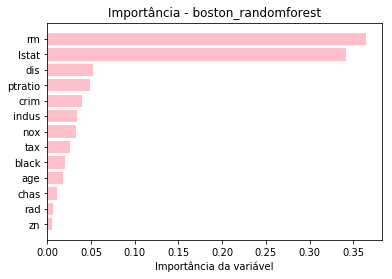

In [269]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

features = X_test.columns
importances = boston_randomforest.feature_importances_

indices = np.argsort(importances)

plt.title('Importância - boston_randomforest')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importância da variável')
plt.show()

### 8.3.4 Boosting

Agora, utilizaremos o <i>Boosting</i>. Utilizaremos o Gradient Boosting para a regressão.
O <i>learning_rate</i> é o parâmetro de encurtamento dado em (8.10). Queremos 5000 árvores (<i>n_estimators</i>), e o <i>max_depth</i> limita a profundidade de cada árvore.

In [256]:
from sklearn.ensemble import GradientBoostingRegressor

In [257]:
boston_boosting = GradientBoostingRegressor(n_estimators = 5000,max_depth = 4,learning_rate = 0.2,
                                            random_state = 42)

boston_boosting.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=5000, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [258]:
Y3_pred = boston_boosting.predict(X_test)

In [259]:
mean_squared_error(Y_test,Y3_pred)

15.24949266884432

Aqui, visualizamos a importância de cada variável. Vemos que $lstat$ e $rm$ são as variáveis mais importantes.

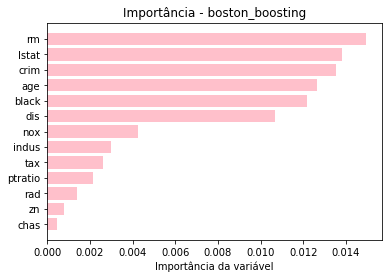

In [270]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

features = X_test.columns
importances = boston_boosting.feature_importances_

indices = np.argsort(importances)

plt.title('Importância - boston_boosting')
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importância da variável')
plt.show()

Podemos produzir <i>gráficos de dependência parcial</i> para as variáveis mais importantes ($lstat$ e $rm$, colunas 5 e 12). Estes gráficos ilustram o efeito marginal das variáveis selecionadas na resposta após retirar a integração das outras variáveis. Neste caso, como podemos esperar, os preços medianos de casas aumentam com $rm$ e diminuem com $lstat$.

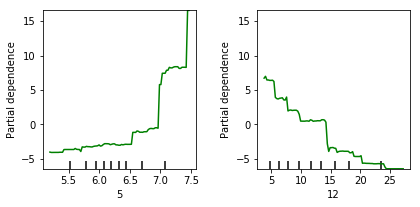

In [268]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig,axs = plot_partial_dependence(boston_boosting,X_test,[5,12])